# Titanic dataset

In [1]:
import pandas as pd
import os

TITANIC_PATH = os.path.join("data", "titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

treinamento_original = load_titanic_data("train.csv")
treinamento_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.model_selection import train_test_split
# Dividir a base em características (X) e rótulos (y) 
X = treinamento_original.drop("Survived", axis=1) 
y = treinamento_original["Survived"] 

# Dividir a base em conjuntos de treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

print(f"Dimensões do conjunto de treinamento: {X_train.shape}") 
print(f"Dimensões do conjunto de teste: {X_test.shape}")

Dimensões do conjunto de treinamento: (623, 11)
Dimensões do conjunto de teste: (268, 11)


In [3]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


In [4]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

Let's explicitly set the `PassengerId` column as the index column:

In [5]:
train_data_experimento = X_train.copy()
test_data_experimento = X_test.copy()

train_data = X_train.set_index("PassengerId")
test_data = X_test.set_index("PassengerId")

Let's get more info to see how much data is missing:

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 446 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Name      623 non-null    object 
 2   Sex       623 non-null    object 
 3   Age       499 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Ticket    623 non-null    object 
 7   Fare      623 non-null    float64
 8   Cabin     139 non-null    object 
 9   Embarked  622 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 53.5+ KB


In [7]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

Okay, the **Age**, **Cabin** and **Embarked** attributes are sometimes null (less than 891 non-null), especially the **Cabin** (77% are null). We will ignore the **Cabin** for now and focus on the rest. The **Age** attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable. We could be a bit smarter by predicting the age based on the other columns (for example, the median age is 37 in 1st class, 29 in 2nd class and 24 in 3rd class), but we'll keep things simple and just use the overall median age.

The **Name** and **Ticket** attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [8]:
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,623.000000,499.000000,623.000000,623.000000,623.000000
mean,2.341894,29.256353,0.576244,0.386838,31.840730
std,0.819945,14.558567,1.216267,0.807692,51.027372
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,30.750000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data["Pclass"].value_counts()

Pclass
3    352
1    139
2    132
Name: count, dtype: int64

In [10]:
train_data["Sex"].value_counts()

Sex
male      410
female    213
Name: count, dtype: int64

In [11]:
train_data["Embarked"].value_counts()

Embarked
S    457
C    110
Q     55
Name: count, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

Now let's build our preprocessing pipelines, starting with the pipeline for numerical attributes:

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

Now we can build the pipeline for the categorical attributes:

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

Finally, let's join the numerical and categorical pipelines:

In [15]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

Cool! Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.

In [16]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-1.91971935, -0.47416141,  1.99885349, ...,  0.        ,
         0.        ,  1.        ],
       [-0.0772525 , -0.47416141, -0.47932706, ...,  0.        ,
         0.        ,  1.        ],
       [-2.15002771,  0.34868694,  0.75976322, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.92075038,  1.17153529, -0.47932706, ...,  0.        ,
         0.        ,  1.        ],
       [-1.15202483,  0.34868694,  1.99885349, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61463866, -0.47416141,  0.75976322, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

We are now ready to train a classifier. Let's start with a `RandomForestClassifier`:

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [20]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7995135688684075

## Support Vector Classifier (SVC):

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8217869943676395

"Mas em vez de apenas observar a precisão média ao longo das 10 dobras de validação cruzada, vamos plotar todas as 10 pontuações para cada modelo, juntamente com um boxplot destacando os quartis inferior e superior, e 'bigodes' mostrando a extensão das pontuações (graças a Nevin Yilmaz por sugerir esta visualização). Note que a função `boxplot()` detecta outliers (chamados de 'fliers') e não os inclui nos bigodes. Especificamente, se o quartil inferior é $Q_1$ e o quartil superior é $Q_3$, então o intervalo interquartil $IQR = Q_3 - Q_1$ (esta é a altura da caixa), e qualquer pontuação menor que $Q_1 - 1.5 \times IQR$ é um flier, assim como qualquer pontuação maior que $Q_3 + 1.5 \times IQR$."

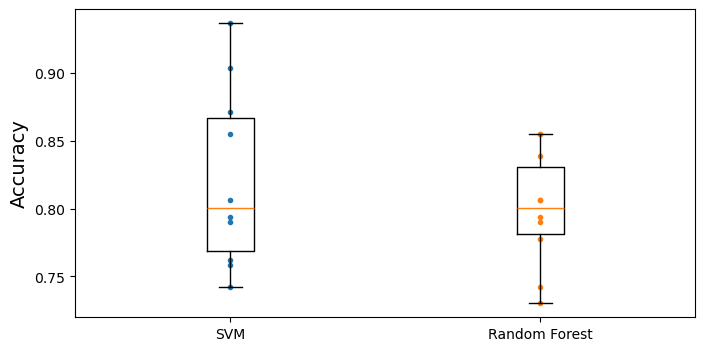

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

O classificador de floresta aleatória obteve uma pontuação muito alta em uma das 10 dobras, mas, no geral, teve uma pontuação média mais baixa, bem como uma dispersão maior, então parece que o classificador SVM é mais provável de generalizar bem.

## Metricas de Classificação

Apenas para critério de estudo, irei aplicar o modelo na propria `base de treino` para `estudo` da matriz de confusão.

In [23]:
# Aqui os Index serão usados como chave
test_data_experimento['Survived'] = y_test
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1


In [24]:
# Realiza previções: 
y_pred_forest_clf = forest_clf.predict(X_test)

test_data_experimento['y_pred_forest_clf'] = y_pred_forest_clf
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_pred_forest_clf
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1,0


In [25]:
# Treinar o modelo SVM
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svm_clf = svm_clf.predict(X_test)

test_data_experimento['y_pred_svm_clf'] = y_pred_svm_clf
test_data_experimento.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,y_pred_forest_clf,y_pred_svm_clf
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1,1,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1,0,1


In [26]:
from sklearn.metrics import confusion_matrix

# Supondo que y_test e y_pred estejam definidos
cm_random = confusion_matrix(y_test, y_pred_forest_clf)

VP = cm_random[1, 1]
FP = cm_random[0, 1]
VN = cm_random[0, 0]
FN = cm_random[1, 0]

# Calcular métricas manualmente
acurácia = (VP + VN) / (VP + FP + VN + FN)
precisão = VP / (VP + FP)
recall = VP / (VP + FN)
f1_score = 2 * (precisão * recall) / (precisão + recall)

print('RandomForestClassifier')
print(f"Acurácia: {acurácia}")
print(f"Precisão: {precisão}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


RandomForestClassifier
Acurácia: 0.7873134328358209
Precisão: 0.77
Recall: 0.6936936936936937
F1-Score: 0.7298578199052133


In [27]:
[[VN, FP],[FN, VP]]

[[134, 23], [34, 77]]

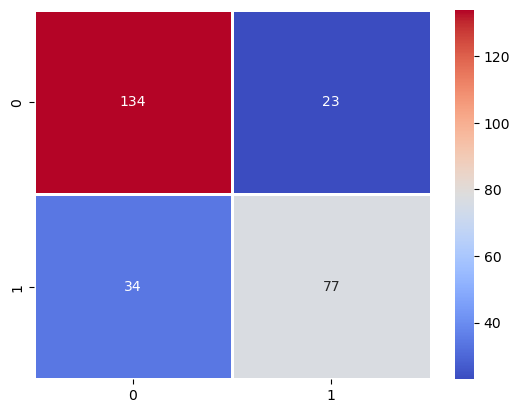

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Criando o heatmap
sns.heatmap(cm_random, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

In [29]:
# Supondo que y_test e y_pred estejam definidos
cm = confusion_matrix(y_test, y_pred_svm_clf)

VP = cm[1, 1]
FP = cm[0, 1]
VN = cm[0, 0]
FN = cm[1, 0]

# Calcular métricas manualmente
acurácia = (VP + VN) / (VP + FP + VN + FN)
precisão = VP / (VP + FP)
recall = VP / (VP + FN) # tpr = TP / (TP + FN) (True Positive Rate)
f1_score = 2 * (precisão * recall) / (precisão + recall)

print('SVM')
print(f"Acurácia: {acurácia}")
print(f"Precisão: {precisão}")
print(f"Recall (Sensitivity/True Positive Rate): {recall}")
print(f"F1-Score: {f1_score}")

SVM
Acurácia: 0.8283582089552238
Precisão: 0.8350515463917526
Recall (Sensitivity/True Positive Rate): 0.7297297297297297
F1-Score: 0.7788461538461539


$$
\text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$


In [30]:
import pandas as pd
from typing import Dict

def confusion_matriz(df: pd.DataFrame, target: str, y_pred: str) -> Dict[str, int]:
    """
    Calcula a matriz de confusão para um conjunto de dados fornecido.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados reais e as previsões.
    target (str): Nome da coluna que contém os valores reais.
    y_pred (str): Nome da coluna que contém os valores previstos.

    Retorna:
    Dict[str, int]: 
            Um dicionário contendo os valores de 
            Verdadeiros Positivos (VP), Falsos Positivos (FP), 
            Verdadeiros Negativos (VN) e Falsos Negativos (FN).
    """
    VP = df.query(f'{target} == 1 and {y_pred} == 1').shape[0]
    FP = df.query(f'{target} == 0 and {y_pred} == 1').shape[0]
    VN = df.query(f'{target} == 0 and {y_pred} == 0').shape[0]
    FN = df.query(f'{target} == 1 and {y_pred} == 0').shape[0]
    
    return {
        'Verdadeiros Positivos (VP)': VP,
        'Falsos Positivos (FP)': FP,
        'Verdadeiros Negativos (VN)': VN,
        'Falsos Negativos (FN)': FN
    }